In [1]:
from keras.datasets import mnist
#loading the mnist dataset

(train_data, train_target),(test_data, test_target) = mnist.load_data()
#spliting the dataset into training and testing

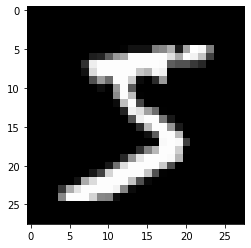

In [2]:
from matplotlib import pyplot as plt

plt.imshow(train_data[0],cmap='gray')
plt.show()

In [3]:
print(train_target[0])

5


In [4]:
train_data= train_data / 255.0 
test_data=test_data/255.0
#Scaling the 0-255 gray image to 0-1 (Requirement before training the Neural Network)

In [5]:
from keras.models import Sequential
#loading Sequential model from keras
from keras.layers import Flatten,Dense
#loading Flatten and Dense layers from keras

model = Sequential()
#creating a Sequential type neural network (a empty neural network, add layer by layer)
model.add(Flatten(input_shape=(28, 28)))
#a flatten layer to flatten up the 28x28 input image into 784 inputs
model.add(Dense(512, activation='relu'))
#1st Hidden layer with 512 Neurons
model.add(Dense(256, activation='relu'))
#2nd Hidden layer with 256 Neurons
model.add(Dense(10, activation='softmax'))
#output layer with 10 output neurons
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
#compiling the neural network with necessary parameters

model.summary()
#neural network architecture and parameters

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.utils import to_categorical

train_target=to_categorical(train_target)
#convering the labels into a categorical representation

history=model.fit(train_data, train_target, epochs=20)
#training the neural network for 50 epochs

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0096 - accuracy: 0.9369
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0048 - accuracy: 0.9699
Epoch 3/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0037 - accuracy: 0.9766
Epoch 4/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0031 - accuracy: 0.9807
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0027 - accuracy: 0.9833
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0023 - accuracy: 0.9859
Epoch 7/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0023 - accuracy: 0.9859
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0022 - accuracy: 0.9868
Epoch 9/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0018 - accuracy: 0.9891
Epoch 10/20
1875/1875 [==============================] - 10s 6ms/step - l

In [7]:
results=model.predict(test_data)
print(results[:10])
#testing and getting results using unseen data

[[0.0000000e+00 4.2953248e-30 0.0000000e+00 1.6021240e-27 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 2.0152138e-38 0.0000000e+00]
 [0.0000000e+00 6.3712988e-29 1.0000000e+00 9.7170101e-34 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.4292390e-22 1.0000000e+00 3.5858275e-22 3.9880527e-33 8.3289995e-15
  3.6663509e-25 1.2413677e-29 4.2885541e-19 4.1326383e-20 1.1974994e-25]
 [1.0000000e+00 3.4864863e-21 1.8796580e-08 2.0289357e-16 2.9258602e-24
  3.7805176e-22 6.1507551e-21 6.2013693e-26 4.9067310e-20 1.2619419e-13]
 [3.3545827e-37 0.0000000e+00 3.3064639e-33 0.0000000e+00 1.0000000e+00
  2.3599989e-31 0.0000000e+00 5.2013152e-28 4.2989550e-34 4.4383296e-34]
 [4.5459727e-27 1.0000000e+00 5.3892476e-31 0.0000000e+00 2.0024207e-19
  2.7401514e-33 2.7253131e-36 3.2418953e-24 1.0085716e-27 9.3837438e-31]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 4.6075989e-36 1.5577883e-24 

In [8]:
import numpy as np
results=np.argmax(results,axis=1)

In [9]:
print(test_target[:10])
print(results[:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


In [10]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_target,results)
print('Accuracy:',accuracy)
#getting the accuracy between the actual and predicted results

Accuracy: 0.9772


Text(0, 0.5, 'loss')

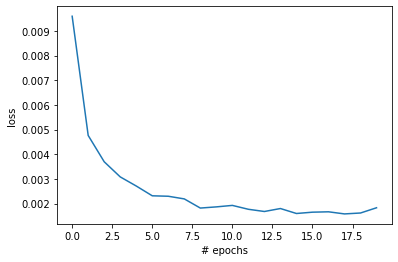

In [11]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
#visualizing the loss

Text(0, 0.5, 'accuracy')

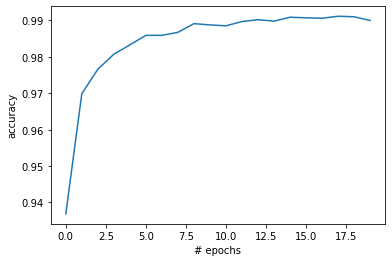

In [13]:
plt.plot(history.history['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('accuracy')
#visualizing the accuracy

In [14]:
model.save_weights('FFNN-MNIST.h5')